<a href="https://colab.research.google.com/github/rusamentiaga/CoronaDashboard/blob/master/2_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
import matplotlib.pyplot as plt
import torch
torch.version.__version__

'1.8.0+cu101'

In [181]:
torch.cuda.is_available()

True

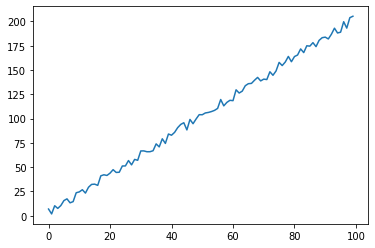

In [182]:
x = torch.tensor(range(100))
W = 2
B = 3
y = W*x + B
y = y + 10*(torch.rand(x.shape[0]) - 0.5)
plt.plot(x,y)

In [183]:
def model(x, w, b):
  return w * x + b

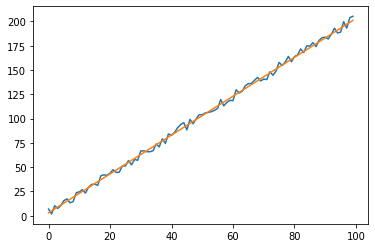

In [184]:
plt.plot(x,y)

yp = model(x, W, B)
plt.plot(x,yp)

In [185]:
def loss_fn(yp, y):
  squared_diffs = (yp - y)**2
  return squared_diffs.mean()

In [186]:
loss_fn(yp, y)

tensor(8.9577)

In [187]:
y3 = model(x, W, B + .3)
loss_fn(y3, y)

tensor(8.9628)

*   y = wx + b
*   dy/dw = x
*   dy/db = 1
*   dloss/dw = dloss/dy * dy/dw
*   dloss/db = dloss/dy * dy/db




In [206]:
def dy_dw(x, w, b):
  return x

def dy_db(x, w, b):
  return 1.0

def dloss_fn(yp, y):
  dsq_diffs = 2 * (yp - y) / yp.size(0)
  return dsq_diffs

def grad_fn(x, y, yp, w, b):
  dloss_dy = dloss_fn(yp, y)
  dloss_dw = dloss_dy * dmodel_dw(x, w, b)
  dloss_db = dloss_dy * dmodel_db(x, w, b)
  return (dloss_dw.sum(), dloss_db.sum())

In [211]:
def training_loop(n_epochs, learning_rate, wp, bp, x, y):

  for epoch in range(n_epochs):
      # Computes our model's predicted output
      yp = model(x, wp, bp)
      
      # How wrong is our model? That's the error! 
      loss = loss_fn(yp, y)

      (wp_grad, bp_grad) = grad_fn(x, y, yp, wp, bp)
    
      # Updates parameters using gradients and the learning rate
      wp = wp - learning_rate * wp_grad
      bp = bp - learning_rate * bp_grad

      if epoch+1 in (1, 2, 3, 4, 5, 10, 100, 500, 1000, 5000, 10000):
        print(f'Epoch {epoch+1}, Loss {loss}, wp_grad: {wp_grad}, bp_grad: {bp_grad}')
    
  return (wp, bp)

In [223]:
training_loop(n_epochs = 1000, 
              learning_rate = 1e-2,
              wp = 1,
              bp = 1,
              x = x,
              y = y)

Epoch 1, Loss 3525.310302734375, wp_grad: -6795.2861328125, bp_grad: -103.28299713134766
Epoch 2, Loss 14710468.0, wp_grad: 439553.375, bp_grad: 6626.115234375
Epoch 3, Loss 61550612480.0, wp_grad: -28432480.0, bp_grad: -428664.28125
Epoch 4, Loss 257536338952192.0, wp_grad: 1839152640.0, bp_grad: 27728060.0
Epoch 5, Loss 1.0775679183062303e+18, wp_grad: -118965444608.0, bp_grad: -1793587584.0
Epoch 10, Loss 1.3818960260105483e+36, wp_grad: 1.3472127738748653e+20, bp_grad: 2.0311309910865347e+18
Epoch 100, Loss nan, wp_grad: nan, bp_grad: nan
Epoch 500, Loss nan, wp_grad: nan, bp_grad: nan
Epoch 1000, Loss nan, wp_grad: nan, bp_grad: nan


(tensor(nan), tensor(nan))

In [226]:
(wp, bp) = training_loop(n_epochs = 10000, 
              learning_rate = 1e-4,
              wp = 1,
              bp = 1,
              x = x,
              y = y)

Epoch 1, Loss 3525.310302734375, wp_grad: -6795.2861328125, bp_grad: -103.28299713134766
Epoch 2, Loss 423.53289794921875, wp_grad: -2331.79931640625, bp_grad: -35.989013671875
Epoch 3, Loss 58.29096221923828, wp_grad: -800.150634765625, bp_grad: -12.897002220153809
Epoch 4, Loss 15.282767295837402, wp_grad: -274.56427001953125, bp_grad: -4.972934246063232
Epoch 5, Loss 10.218374252319336, wp_grad: -94.20850372314453, bp_grad: -2.2537522315979004
Epoch 10, Loss 9.542113304138184, wp_grad: -0.4363059997558594, bp_grad: -0.83977872133255
Epoch 100, Loss 9.53588581085205, wp_grad: 0.0136260986328125, bp_grad: -0.8292016983032227
Epoch 500, Loss 9.508918762207031, wp_grad: 0.011615753173828125, bp_grad: -0.8125641345977783
Epoch 1000, Loss 9.476723670959473, wp_grad: 0.011798858642578125, bp_grad: -0.7922028303146362
Epoch 5000, Loss 9.270343780517578, wp_grad: 0.01035308837890625, bp_grad: -0.6466619968414307
Epoch 10000, Loss 9.106322288513184, wp_grad: 0.0068359375, bp_grad: -0.50176906

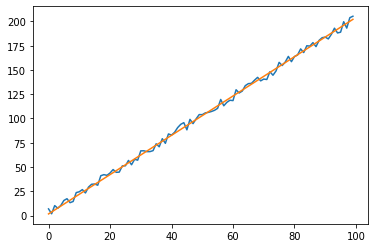

In [227]:
plt.plot(x,y)

yp = model(x, wp, bp)
plt.plot(x, yp)

In [241]:
training_loop(n_epochs = 1000, 
              learning_rate = 1e-2,
              wp = 1,
              bp = 1,
              x = x*0.1,
              y = y)

Epoch 1, Loss 12300.7021484375, wp_grad: -1270.55859375, bp_grad: -192.3830108642578
Epoch 2, Loss 1333.7064208984375, wp_grad: -417.1369323730469, bp_grad: -62.75004577636719
Epoch 3, Loss 151.9454345703125, wp_grad: -136.9907989501953, bp_grad: -20.198482513427734
Epoch 4, Loss 24.600749969482422, wp_grad: -45.02935028076172, bp_grad: -6.232430458068848
Epoch 5, Loss 10.875382423400879, wp_grad: -14.841585159301758, bp_grad: -1.6498804092407227
Epoch 10, Loss 9.20076847076416, wp_grad: -0.14387202262878418, bp_grad: 0.5678740739822388
Epoch 100, Loss 8.9981050491333, wp_grad: -0.05587482452392578, bp_grad: 0.3684151768684387
Epoch 500, Loss 8.860799789428711, wp_grad: -0.007681846618652344, bp_grad: 0.05037379264831543
Epoch 1000, Loss 8.858201026916504, wp_grad: -0.0006377696990966797, bp_grad: 0.004191458225250244


(tensor(20.0964), tensor(2.6664))

In [252]:
from sklearn.linear_model import LinearRegression
import numpy
linr = LinearRegression()
xnp = x.numpy().reshape((-1, 1))
ynp = y.numpy()
linr.fit(xnp, ynp)
print(linr.intercept_, linr.coef_[0])

yp = model(x, linr.coef_[0], linr.intercept_)
     
# How wrong is our model? That's the error! 
loss = loss_fn(yp, y)

print(loss)

2.6580026777663477 2.0097676468696686
tensor(8.8582)


In [246]:
y.numpy()


array([  6.842782 ,   1.8297791,  10.23668  ,   7.50888  ,  10.456456 ,
        15.546988 ,  17.334784 ,  13.251529 ,  14.482702 ,  23.625095 ,
        24.497028 ,  26.724127 ,  23.275301 ,  29.287611 ,  32.208347 ,
        32.477135 ,  31.224327 ,  41.037804 ,  42.117535 ,  41.438034 ,
        43.801003 ,  47.374527 ,  44.5306   ,  44.718582 ,  51.149837 ,
        51.22189  ,  56.7646   ,  52.326454 ,  57.936428 ,  57.042522 ,
        66.64189  ,  66.69882  ,  65.8369   ,  65.86917  ,  66.8682   ,
        73.91664  ,  70.82315  ,  79.150894 ,  74.40966  ,  84.06166  ,
        82.85756  ,  85.77603  ,  90.60768  ,  93.96954  ,  95.68407  ,
        88.29765  ,  99.073044 ,  94.68254  ,  99.57707  , 103.99653  ,
       103.92618  , 105.75916  , 106.29568  , 107.21233  , 108.42995  ,
       110.44249  , 119.58943  , 113.064064 , 116.63016  , 118.76877  ,
       118.418686 , 129.58627  , 126.26913  , 128.20772  , 133.82349  ,
       135.88791  , 136.18428  , 139.45053  , 142.35336  , 138.7